Sydneysiege tweet-level, topic exploration : [report](https://docs.google.com/spreadsheets/d/1MxoVkvCgLIHDSn_I_te9wZIXjlFQDb-fe8FhXAfGy8Y/edit?usp=sharing)

# Load library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from nltk import word_tokenize, corpus
import gensim
from gensim import corpora,models
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import remove_stopwords

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import pyLDAvis.gensim_models
from pprint import pprint

In [ ]:
# from google.colab import drive
# import os
# drive.mount('/content/drive')

# Load Data

In [44]:
combined_data = pd.read_csv('sydneysiege/18 targetanalysis/targetdata/combined_rumor_target.csv',header = 0,index_col = 0,encoding = 'utf-8')

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Rumor Source tweets - LDA

In [6]:
src = combined_data[combined_data.src_reply=='src']
src.isnull().sum()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tweet_id        0
user_id         0
date            0
rumorlabel      0
tweet           0
cleaned_text    0
targetlabel     0
sentiment       0
src_reply       0
dtype: int64

In [45]:
target_tw = src.loc[src.targetlabel==1,'cleaned_text']
nontarget_tw = src.loc[src.targetlabel==0,'cleaned_text']

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
print("number of target source tweets: {}".format(len(target_tw)))
print("number of non-target source tweets: {}".format(len(nontarget_tw)))

number of target source tweets: 84
number of non-target source tweets: 415


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
target_tw_list = target_tw.apply(word_tokenize).tolist()
nontarget_tw_list = nontarget_tw.apply(word_tokenize).tolist()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Target

In [10]:
#Target dictionary
id2word = corpora.Dictionary(target_tw_list)
print(id2word)

Dictionary(265 unique tokens: ['break', 'cafe', 'doors', 'flag', 'force']...)


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Term Document Frequency
corpus_target = [id2word.doc2bow(tw) for tw in target_tw_list]

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
def compute_coherence_values(corpus, dictionary, k):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=1,
                                           passes=20)
    
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=target_tw_list, #要改
                                         dictionary=id2word,    #要改
                                         coherence='c_v')
    return coherence_model_lda.get_coherence()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# Topics range
min_topics = 2
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
target_results ={'Topics': [], 'Coherence': []}

for k in topics_range:

    # get the coherence score for the given parameters
    cv = compute_coherence_values(corpus=corpus_target, 
                                  dictionary=id2word,k=k)
    # Save the model results
    target_results['Topics'].append(k)
    target_results['Coherence'].append(cv)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
target_results = pd.DataFrame(target_results)
target_results

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topics,Coherence
0,2,0.356322
1,3,0.368953
2,4,0.382766
3,5,0.390673
4,6,0.416249
5,7,0.379986
6,8,0.366640
7,9,0.368999
8,10,0.363292
9,11,0.338131


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


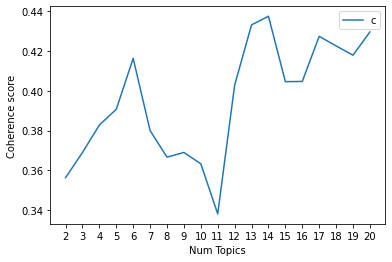

In [18]:
# Show graph
x = range(min_topics, max_topics, step_size)
plt.plot(target_results.Topics, target_results.Coherence)
plt.xticks(x)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

### choose the number of topics: **6**

In [19]:
lda_model_target = gensim.models.LdaMulticore(corpus=corpus_target,id2word=id2word,num_topics=6, 
                                       random_state=100,chunksize=1,passes=20)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
target_topics = pyLDAvis.gensim_models.prepare(lda_model_target,corpus_target,id2word)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [21]:
pyLDAvis.display(target_topics)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
save_path = 'D:/論文/PHEME9/Code/sydneysiege/18 targetanalysis/twanalysis\\'
pyLDAvis.save_html(target_topics, save_path+'sydneysiege_lda_srctarget.html')

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Non-Target

In [48]:
#Rumor dictionary
id2word_non = corpora.Dictionary(nontarget_tw_list)
print(id2word_non)

Dictionary(792 unique tokens: ['break', 'cafe', 'chocolat', 'hold', 'hostages']...)


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
# Term Document Frequency
corpus_nontarget = [id2word_non.doc2bow(tw) for tw in nontarget_tw_list]

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
def compute_coherence_values(corpus, dictionary, k):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=1,
                                           passes=20)
    
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=nontarget_tw_list, #要改
                                         dictionary=id2word_non,    #要改
                                         coherence='c_v')
    return coherence_model_lda.get_coherence()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
# Topics range
min_topics = 2
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
nontarget_results ={'Topics': [], 'Coherence': []}

for k in topics_range:

    # get the coherence score for the given parameters
    cv = compute_coherence_values(corpus=corpus_nontarget, 
                                  dictionary=id2word_non,k=k)
    # Save the model results
    nontarget_results['Topics'].append(k)
    nontarget_results['Coherence'].append(cv)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
nontarget_results = pd.DataFrame(nontarget_results)
nontarget_results

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topics,Coherence
0,2,0.260143
1,3,0.292883
2,4,0.333402
3,5,0.369527
4,6,0.401023
5,7,0.425709
6,8,0.464275
7,9,0.479410
8,10,0.429968
9,11,0.500667


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


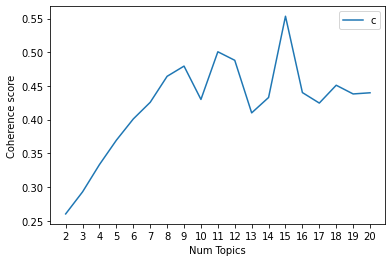

In [32]:
# Show graph
import matplotlib.pyplot as plt
x = range(min_topics, max_topics, step_size)

plt.plot(nontarget_results.Topics, nontarget_results.Coherence)
plt.xticks(x)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

### choose the number of topics: **9**

In [51]:
lda_model_nontarget = gensim.models.LdaMulticore(corpus=corpus_nontarget,id2word=id2word_non,num_topics=9, 
                                       random_state=100,chunksize=1,passes=20)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
nontarget_topics = pyLDAvis.gensim_models.prepare(lda_model_nontarget,corpus_nontarget,id2word_non)
pyLDAvis.display(nontarget_topics)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [53]:
save_path = 'D:/論文/PHEME9/Code/sydneysiege/18 targetanalysis/twanalysis\\'
pyLDAvis.save_html(nontarget_topics, save_path+'sydneysiege_lda_srcnontarget.html')

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Rumor Reply tweets - LDA

[report](https://docs.google.com/spreadsheets/d/1MxoVkvCgLIHDSn_I_te9wZIXjlFQDb-fe8FhXAfGy8Y/edit?usp=sharing)

In [ ]:
combined_data = pd.read_csv('combined_rumor_target.csv',header = 0,index_col = 0,encoding = 'utf-8')

In [54]:
reply = combined_data[combined_data.src_reply=='reply']
reply.isnull().sum()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tweet_id        0
user_id         0
date            0
rumorlabel      0
tweet           0
cleaned_text    0
targetlabel     0
sentiment       0
src_reply       0
dtype: int64

In [55]:
target_tw = reply.loc[reply.targetlabel==1,'cleaned_text']
nontarget_tw = reply.loc[reply.targetlabel==0,'cleaned_text']

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
print("number of target reply tweets: {}".format(len(target_tw)))
print("number of non-target reply tweets: {}".format(len(nontarget_tw)))

number of target reply tweets: 1943
number of non-target reply tweets: 5428


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
target_tw_list = target_tw.apply(word_tokenize).tolist()
nontarget_tw_list = nontarget_tw.apply(word_tokenize).tolist()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Target

In [58]:
#Target dictionary
id2word = corpora.Dictionary(target_tw_list)
print(id2word)

Dictionary(4366 unique tokens: ['dudes', 'flag', 'isis', 'not', 'use']...)


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
# Term Document Frequency
corpus_target = [id2word.doc2bow(tw) for tw in target_tw_list]

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
def compute_coherence_values(corpus, dictionary, k):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=50,
                                           passes=20)
    
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=target_tw_list, #要改
                                         dictionary=id2word,    #要改
                                         coherence='c_v')
    return coherence_model_lda.get_coherence()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
# Topics range
min_topics = 2
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
target_results ={'Topics': [], 'Coherence': []}

for k in topics_range:

    # get the coherence score for the given parameters
    cv = compute_coherence_values(corpus=corpus_target, 
                                  dictionary=id2word,k=k)
    # Save the model results
    target_results['Topics'].append(k)
    target_results['Coherence'].append(cv)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
target_results = pd.DataFrame(target_results)
target_results

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topics,Coherence
0,2,0.193354
1,3,0.250526
2,4,0.257115
3,5,0.346431
4,6,0.299259
5,7,0.368446
6,8,0.329096
7,9,0.371164
8,10,0.416572
9,11,0.366036


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


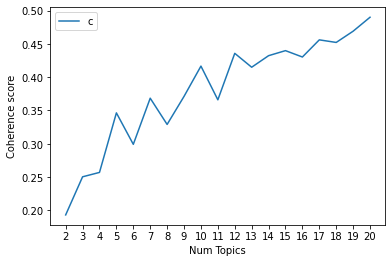

In [64]:
# Show graph
x = range(min_topics, max_topics, step_size)
plt.plot(target_results.Topics, target_results.Coherence)
plt.xticks(x)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

### choose the number of topics: **12**

In [65]:
lda_model_target = gensim.models.LdaMulticore(corpus=corpus_target,id2word=id2word,num_topics=12, 
                                       random_state=100,chunksize=50,passes=20)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
target_topics = pyLDAvis.gensim_models.prepare(lda_model_target,corpus_target,id2word)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [67]:
pyLDAvis.display(target_topics)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
save_path = 'D:/論文/PHEME9/Code/sydneysiege/18 targetanalysis/twanalysis\\'
pyLDAvis.save_html(target_topics, save_path+'sydneysiege_lda_replytarget.html')

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Non-Target

In [69]:
#Rumor dictionary
id2word_non = corpora.Dictionary(nontarget_tw_list)
print(id2word_non)

Dictionary(6247 unique tokens: ['flag', 'not', 'specifically', 'im', 'omg']...)


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
# Term Document Frequency
corpus_nontarget = [id2word_non.doc2bow(tw) for tw in nontarget_tw_list]

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
def compute_coherence_values(corpus, dictionary, k):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=50,
                                           passes=20)
    
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=nontarget_tw_list, #要改
                                         dictionary=id2word_non,    #要改
                                         coherence='c_v')
    return coherence_model_lda.get_coherence()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
# Topics range
min_topics = 2
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
nontarget_results ={'Topics': [], 'Coherence': []}

for k in topics_range:

    # get the coherence score for the given parameters
    cv = compute_coherence_values(corpus=corpus_nontarget, 
                                  dictionary=id2word_non,k=k)
    # Save the model results
    nontarget_results['Topics'].append(k)
    nontarget_results['Coherence'].append(cv)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
nontarget_results = pd.DataFrame(nontarget_results)
nontarget_results

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topics,Coherence
0,2,0.297409
1,3,0.314913
2,4,0.311777
3,5,0.321827
4,6,0.344616
5,7,0.371011
6,8,0.424534
7,9,0.380395
8,10,0.375748
9,11,0.405354


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


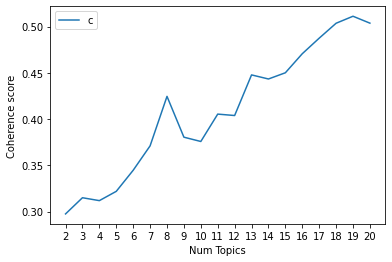

In [75]:
# Show graph
x = range(min_topics, max_topics, step_size)

plt.plot(nontarget_results.Topics, nontarget_results.Coherence)
plt.xticks(x)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

### choose the number of topics: **8**

In [76]:
lda_model_nontarget = gensim.models.LdaMulticore(corpus=corpus_nontarget,id2word=id2word_non,num_topics=8, 
                                       random_state=100,chunksize=50,passes=20)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
nontarget_topics = pyLDAvis.gensim_models.prepare(lda_model_nontarget,corpus_nontarget,id2word_non)
pyLDAvis.display(nontarget_topics)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [78]:
save_path = 'D:/論文/PHEME9/Code/sydneysiege/18 targetanalysis/twanalysis\\'
pyLDAvis.save_html(nontarget_topics, save_path+'sydneysiege_lda_replynontarget.html')

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
